## GD LOGISTIC REGRESSION

In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                        n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

In [2]:
import matplotlib.pyplot as plt

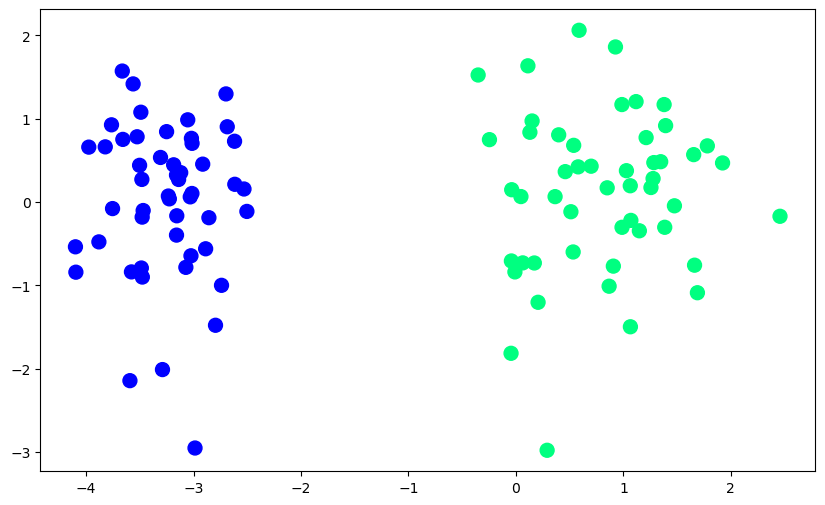

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [4]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty=None, solver='sag')
lor.fit(X, y)

c:\Users\uzebk\miniconda3\envs\dsenv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,penalty,None
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'sag'
,max_iter,100
,multi_class,'deprecated'


In [5]:
print(lor.coef_)
print(lor.intercept_)

[[4.77834706 0.20664266]]
[5.74462843]


In [6]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

In [7]:
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

In [8]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [9]:
#batch gradient descent 
def gd(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    
    for i in range(5000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])
        
    return weights[1:],weights[0]
        

In [10]:
coef_,intercept_ = gd(X,y)

In [11]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [12]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

(-3.0, 2.0)

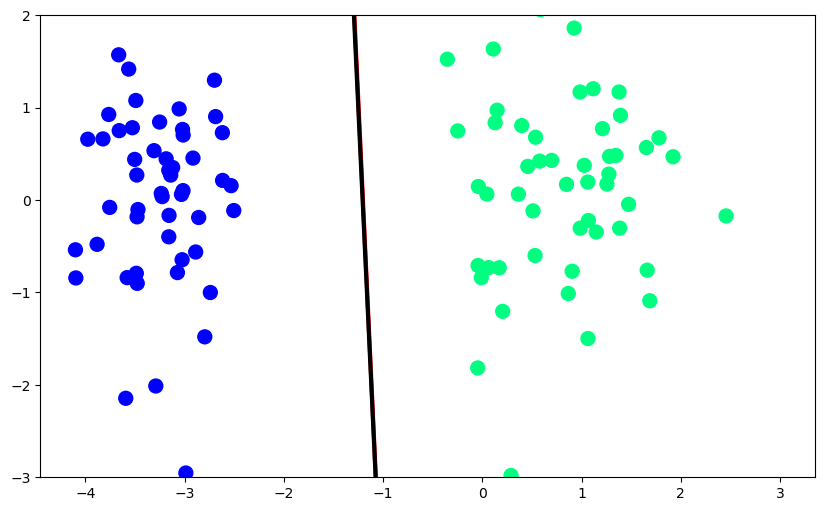

In [13]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# Classification Metrics 

### ACCURACY

In [26]:
import numpy as np

In [27]:
import pandas as pd

In [47]:
df=pd.read_csv('heart.csv')

In [48]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=2)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [51]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [52]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)

c:\Users\uzebk\miniconda3\envs\dsenv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [53]:
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy of Logistic Regression",accuracy_score(y_test,y_pred1))
print("Accuracy of Decision Trees",accuracy_score(y_test,y_pred2))

Accuracy of Logistic Regression 0.8390243902439024
Accuracy of Decision Trees 0.9804878048780488


In [ ]:
confusion_matrix(y_test,y_pred1)


array([[82, 23],
       [10, 90]])

In [37]:
print("Logistic Regression Confusion Matrix\n")
pd.DataFrame(confusion_matrix(y_test,y_pred1),columns=list(range(0,2)))

Logistic Regression Confusion Matrix



,0,1
0,82,23
1,10,90


In [58]:
df=pd.read_csv('traino.csv')

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,1:],df.iloc[:,0],test_size=0.2,random_state=2)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [61]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [62]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)

c:\Users\uzebk\miniconda3\envs\dsenv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [63]:
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy of Logistic Regression",accuracy_score(y_test,y_pred1))
print("Accuracy of Decision Trees",accuracy_score(y_test,y_pred2))

Accuracy of Logistic Regression 0.9145238095238095
Accuracy of Decision Trees 0.8526190476190476


In [45]:
print("Logistic Regression Confusion Matrix\n")
pd.DataFrame(confusion_matrix(y_test,y_pred1),columns=list(range(0,10)))

Logistic Regression Confusion Matrix



,0,1,2,3,4,5,6,7,8,9
0,791,0,1,0,1,9,11,1,6,1
1,0,938,2,4,0,3,0,3,12,0
2,2,9,745,16,9,4,13,13,15,3
3,1,4,19,763,0,36,5,5,20,11
4,2,5,4,0,804,1,7,3,9,21
5,9,3,4,23,10,610,15,10,34,11
6,12,4,12,1,7,8,789,0,5,1
7,3,2,13,6,4,2,0,812,2,29
8,11,12,13,18,1,21,6,6,694,11
9,3,6,2,14,25,4,0,37,7,736


In [46]:
from sklearn.metrics import recall_score,precision_score,f1_score

In [55]:
print("For Logistic regression Model")
print("-"*50)
cdf = pd.DataFrame(confusion_matrix(y_test,y_pred1),columns=list(range(0,2)))
print(cdf)
print("-"*50)
print("Precision - ",precision_score(y_test,y_pred1))
print("Recall - ",recall_score(y_test,y_pred1))
print("F1 score - ",f1_score(y_test,y_pred1))

For Logistic regression Model
--------------------------------------------------
    0   1
0  82  23
1  10  90
--------------------------------------------------
Precision -  0.7964601769911505
Recall -  0.9
F1 score -  0.8450704225352113


In [56]:
print("For DT Model")
print("-"*50)
cdf = pd.DataFrame(confusion_matrix(y_test,y_pred2),columns=list(range(0,2)))
print(cdf)
print("-"*50)
print("Precision - ",precision_score(y_test,y_pred2))
print("Recall - ",recall_score(y_test,y_pred2))
print("F1 score - ",f1_score(y_test,y_pred2))

For DT Model
--------------------------------------------------
     0    1
0  101    4
1    0  100
--------------------------------------------------
Precision -  0.9615384615384616
Recall -  1.0
F1 score -  0.9803921568627451


In [57]:
precision_score(y_test,y_pred1,average=None)

array([0.89130435, 0.79646018])

In [65]:
precision_score(y_test,y_pred1,average='weighted')

0.9142150713630827

In [66]:
recall_score(y_test,y_pred1,average='weighted')

0.9145238095238095

In [67]:
f1_score(y_test,y_pred1,average='weighted')

0.9142794994052751

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       821
           1       0.95      0.98      0.96       962
           2       0.91      0.90      0.91       829
           3       0.90      0.88      0.89       864
           4       0.93      0.94      0.94       856
           5       0.87      0.84      0.85       729
           6       0.93      0.94      0.94       839
           7       0.91      0.93      0.92       873
           8       0.86      0.88      0.87       793
           9       0.89      0.88      0.89       834

    accuracy                           0.91      8400
   macro avg       0.91      0.91      0.91      8400
weighted avg       0.91      0.91      0.91      8400

